<a href="https://colab.research.google.com/github/lmkwytnicholas/nicholas-lee.github.io/blob/master/Seoul_Bike_Rental_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Seoul Bike Rental Prediction**

* What are the factors that influence the number of bikes rented?
  * Explored the data for outliers and missing values
  * Plotted correlation between the variables
  * Built a linear regression model to predict rented bike count by choosing appropriate independent variables


# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='dark', color_codes=True)

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Tech I.S./Datasets/Linear Regression/SeoulBikeData.csv')

# **Extract DataFrame for Only Numeric DataTypes**
..and summarize

In [3]:
df = data.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [4]:
# Descriptive Statistics
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# **Manage for Missing Values**

In [5]:
na_df = df.isna().sum()
na_df

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
dtype: int64

# **Construct Correlation Matrix**

In [6]:
df = pd.DataFrame(df)

In [7]:
df_corr = df.corr()
# type(df_corr)
df.corr()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


# **Extract Strongly Correlated Values**

In [8]:
# type(df_corr)
df_corr = df_corr['Rented Bike Count'][:-1]
df_corr[abs(df_corr)>=0.50].sort_values(ascending=False)
df_corr

Rented Bike Count           1.000000
Hour                        0.410257
Temperature(C)              0.538558
Humidity(%)                -0.199780
Wind speed (m/s)            0.121108
Visibility (10m)            0.199280
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Rainfall(mm)               -0.123074
Name: Rented Bike Count, dtype: float64

# **Plot Correlation Matrix**

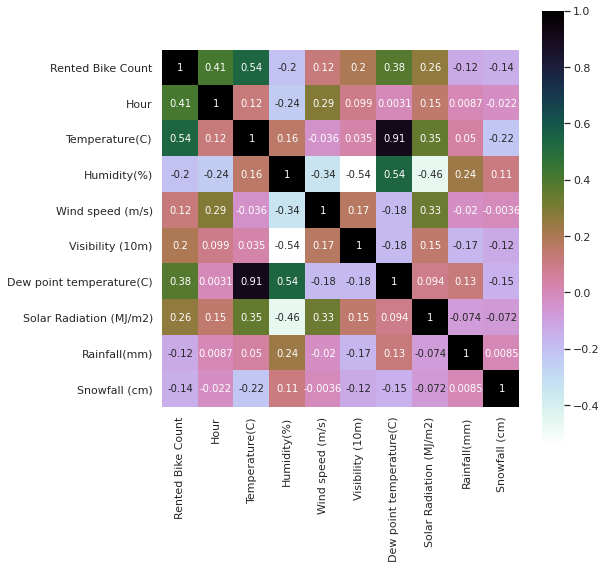

In [9]:
df_corr = df.corr()
plt.figure(figsize=[8,8])
sns.heatmap(df_corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

#**Train Test Split**

In [10]:
# HERE IS WHEN TO EXCLUDE TARGET VARIABLES
df_train = data.drop(['Rented Bike Count'],axis=1) 
df_test = data['Rented Bike Count']

In [11]:
df_train.shape

(8760, 13)

# **Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.25)

In [27]:
train_x = train.drop(['Rented Bike Count'],axis=1)
train_y = train['Rented Bike Count']

test_x = test.drop(['Rented Bike Count'],axis=1)
test_y = test['Rented Bike Count']

print('Dimension of train_x:',train_x.shape)
print('Dimension of train_y:',train_y.shape)
print('Dimension of test_x:',test_x.shape)
print('Dimension of test_y:',test_y.shape)

Dimension of train_x: (6570, 9)
Dimension of train_y: (6570,)
Dimension of test_x: (2190, 9)
Dimension of test_y: (2190,)


# **Linear Regression**


## **Linear Fit for Training Datasets**

In [17]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
model=ln_reg.fit(train_x,train_y)

## **Tests: Scoring Models Linear vs. Ridge vs. Lasso**

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred = ln_reg.predict(test_x)
print('Mean absolute error of linear regression:',mean_absolute_error(df_pred,test_y))
print('Mean square error of linear regression:',mean_squared_error(df_pred,test_y))
print('R_squared score of linear regression:',r2_score(df_pred,test_y))

Mean absolute error of linear regression: 355.7950550998647
Mean square error of linear regression: 231990.46955929967
R_squared score of linear regression: -0.21556388751858369


## **Ridge L2**

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(train_x,train_y)
ridge_score = ridge.score(test_x,test_y)
coeff_used = np.sum(ridge.coef_ !=0)
ridge.coef_

print("Training score:",ridge_score)
print("Number of feature used:",coeff_used)

Training score: 0.4581200940363822
Number of feature used: 9


## **Lasso L1**

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

lasso.fit(train_x, train_y)
lasso_score = lasso.score(test_x,test_y)
coeff_used = np.sum(lasso.coef_ !=0)
lasso.coef_

array([ 2.73332198e+01,  3.07164979e+01, -7.11711409e+00,  3.33441102e-01,
        3.55581327e-02,  4.55079540e-01, -6.82975564e+01, -5.37040254e+01,
        1.22802434e+01])

In [26]:
print('Training score:', lasso_score)
print('Number of features used:',coeff_used)

Training score: 0.4576963518561621
Number of features used: 9


#Conclusion
Features of the dataset, `Temperature(C)`, `Hour` and `Dew Point Temperature(C)` showed the strongest relationships for predicting whether customers will rent a bicycle on a given day according to the dataset tested for Linear, Lasso, and Ridge Regression Modeling.